# 1. Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# 2. EDA

In [2]:
# Read the data

df = pd.read_excel('Sample Data Set.xlsx')
df.head()

,matter_id,team_name,Area of Law,lawyer_name,external_law_firm,Client,Matter Status,start_date,end_date
0,1931,Commercial,Information Technology,Brendis Romney,DuBuque,Safety,Current,2021-03-12,2021-05-22
1,4511,Commercial,Intellectual Property,Teddy Chessill,Langworth-Osinski,Regional,Current,2020-10-15,2020-10-18
2,17451,Commercial,Contracts,Nichols Hakes,No Firm - Internal Only,Research and Development,Current,2021-03-17,2021-06-23
3,22426,Commercial,Contracts,Nichols Hakes,"Prohaska, Olson and Stokes",Operations,Current,2020-11-13,2021-01-02
4,28681,Regulatory,Statutory Interpretation,Aleksandr Vasyushkhin,Langworth-Osinski,Operations,Complete,2021-05-01,NaT


In [3]:
# get the data info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   matter_id          326 non-null    int64         
 1   team_name          326 non-null    object        
 2   Area of Law        326 non-null    object        
 3   lawyer_name        326 non-null    object        
 4   external_law_firm  326 non-null    object        
 5   Client             326 non-null    object        
 6   Matter Status      326 non-null    object        
 7   start_date         326 non-null    datetime64[ns]
 8   end_date           270 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(6)
memory usage: 23.0+ KB


In [4]:
# get the shape
df.shape

(326, 9)

In [5]:
# Check for the null values
df.isnull().sum()

matter_id             0
team_name             0
Area of Law           0
lawyer_name           0
external_law_firm     0
Client                0
Matter Status         0
start_date            0
end_date             56
dtype: int64

In [6]:
# Rename columns

rename_columns = {
    'Area of Law':'area_of_law',
    'Client':'client',
    'Matter Status': 'matter_status'
}

df.rename(columns = rename_columns, inplace = True)
df.columns

Index(['matter_id', 'team_name', 'area_of_law', 'lawyer_name',
       'external_law_firm', 'client', 'matter_status', 'start_date',
       'end_date'],
      dtype='object')

In [7]:
df['matter_status'].unique()

array(['Current', 'Complete'], dtype=object)

In [8]:
df['external_law_firm'].unique()

array(['DuBuque', 'Langworth-Osinski', 'No Firm - Internal Only',
       'Prohaska, Olson and Stokes', 'Kunde-Johnston', 'Kautzer',
       'Wiza Inc', 'Price-Auer', 'Adams LLC', 'Connelly Group', 'Larson'],
      dtype=object)

In [9]:
# only subset the data that has the end date

df = df[~df['end_date'].isna()]
df.drop(columns = 'matter_status', inplace = True)
df.shape

(270, 8)

In [10]:
df['external_law_firm'].unique()

array(['DuBuque', 'Langworth-Osinski', 'No Firm - Internal Only',
       'Prohaska, Olson and Stokes', 'Kunde-Johnston', 'Kautzer',
       'Wiza Inc', 'Price-Auer', 'Adams LLC', 'Connelly Group', 'Larson'],
      dtype=object)

In [11]:
df['external_law_firm'].value_counts(normalize = True)

No Firm - Internal Only       0.225926
Kunde-Johnston                0.137037
Langworth-Osinski             0.129630
Prohaska, Olson and Stokes    0.114815
Price-Auer                    0.107407
Kautzer                       0.103704
DuBuque                       0.074074
Wiza Inc                      0.062963
Larson                        0.022222
Adams LLC                     0.014815
Connelly Group                0.007407
Name: external_law_firm, dtype: float64

In [12]:
df.columns

Index(['matter_id', 'team_name', 'area_of_law', 'lawyer_name',
       'external_law_firm', 'client', 'start_date', 'end_date'],
      dtype='object')

# 3. Visualisation

In [13]:
team_and_members = df.groupby(['team_name', 'lawyer_name'])['matter_id'].count()
    
team_and_members

team_name     lawyer_name          
Commercial    Brendis Romney           12
              Nichols Hakes            19
              Saraann Lakin            10
              Teddy Chessill           23
Construction  Dave Delucia              4
              Karl Stabler             10
Employment    Chelsae O'Ferris          9
              Courtenay Thon            6
              Jakob Sessions           12
              Margo Lydiate            18
              Wilfrid Mellers           5
Property      Broddie Cavee            11
              Laureen O'Loinn          18
              Prue Bannard             23
              Torrin Mouatt             9
Regulatory    Aleksandr Vasyushkhin     7
              Chantalle Townshend      17
              Colet Skune               9
              Cyrille Daviddi          10
              Ellis Jessep              9
              Kimmy Fonzone            12
              Misha Hacun               6
              Parnell Gartell           

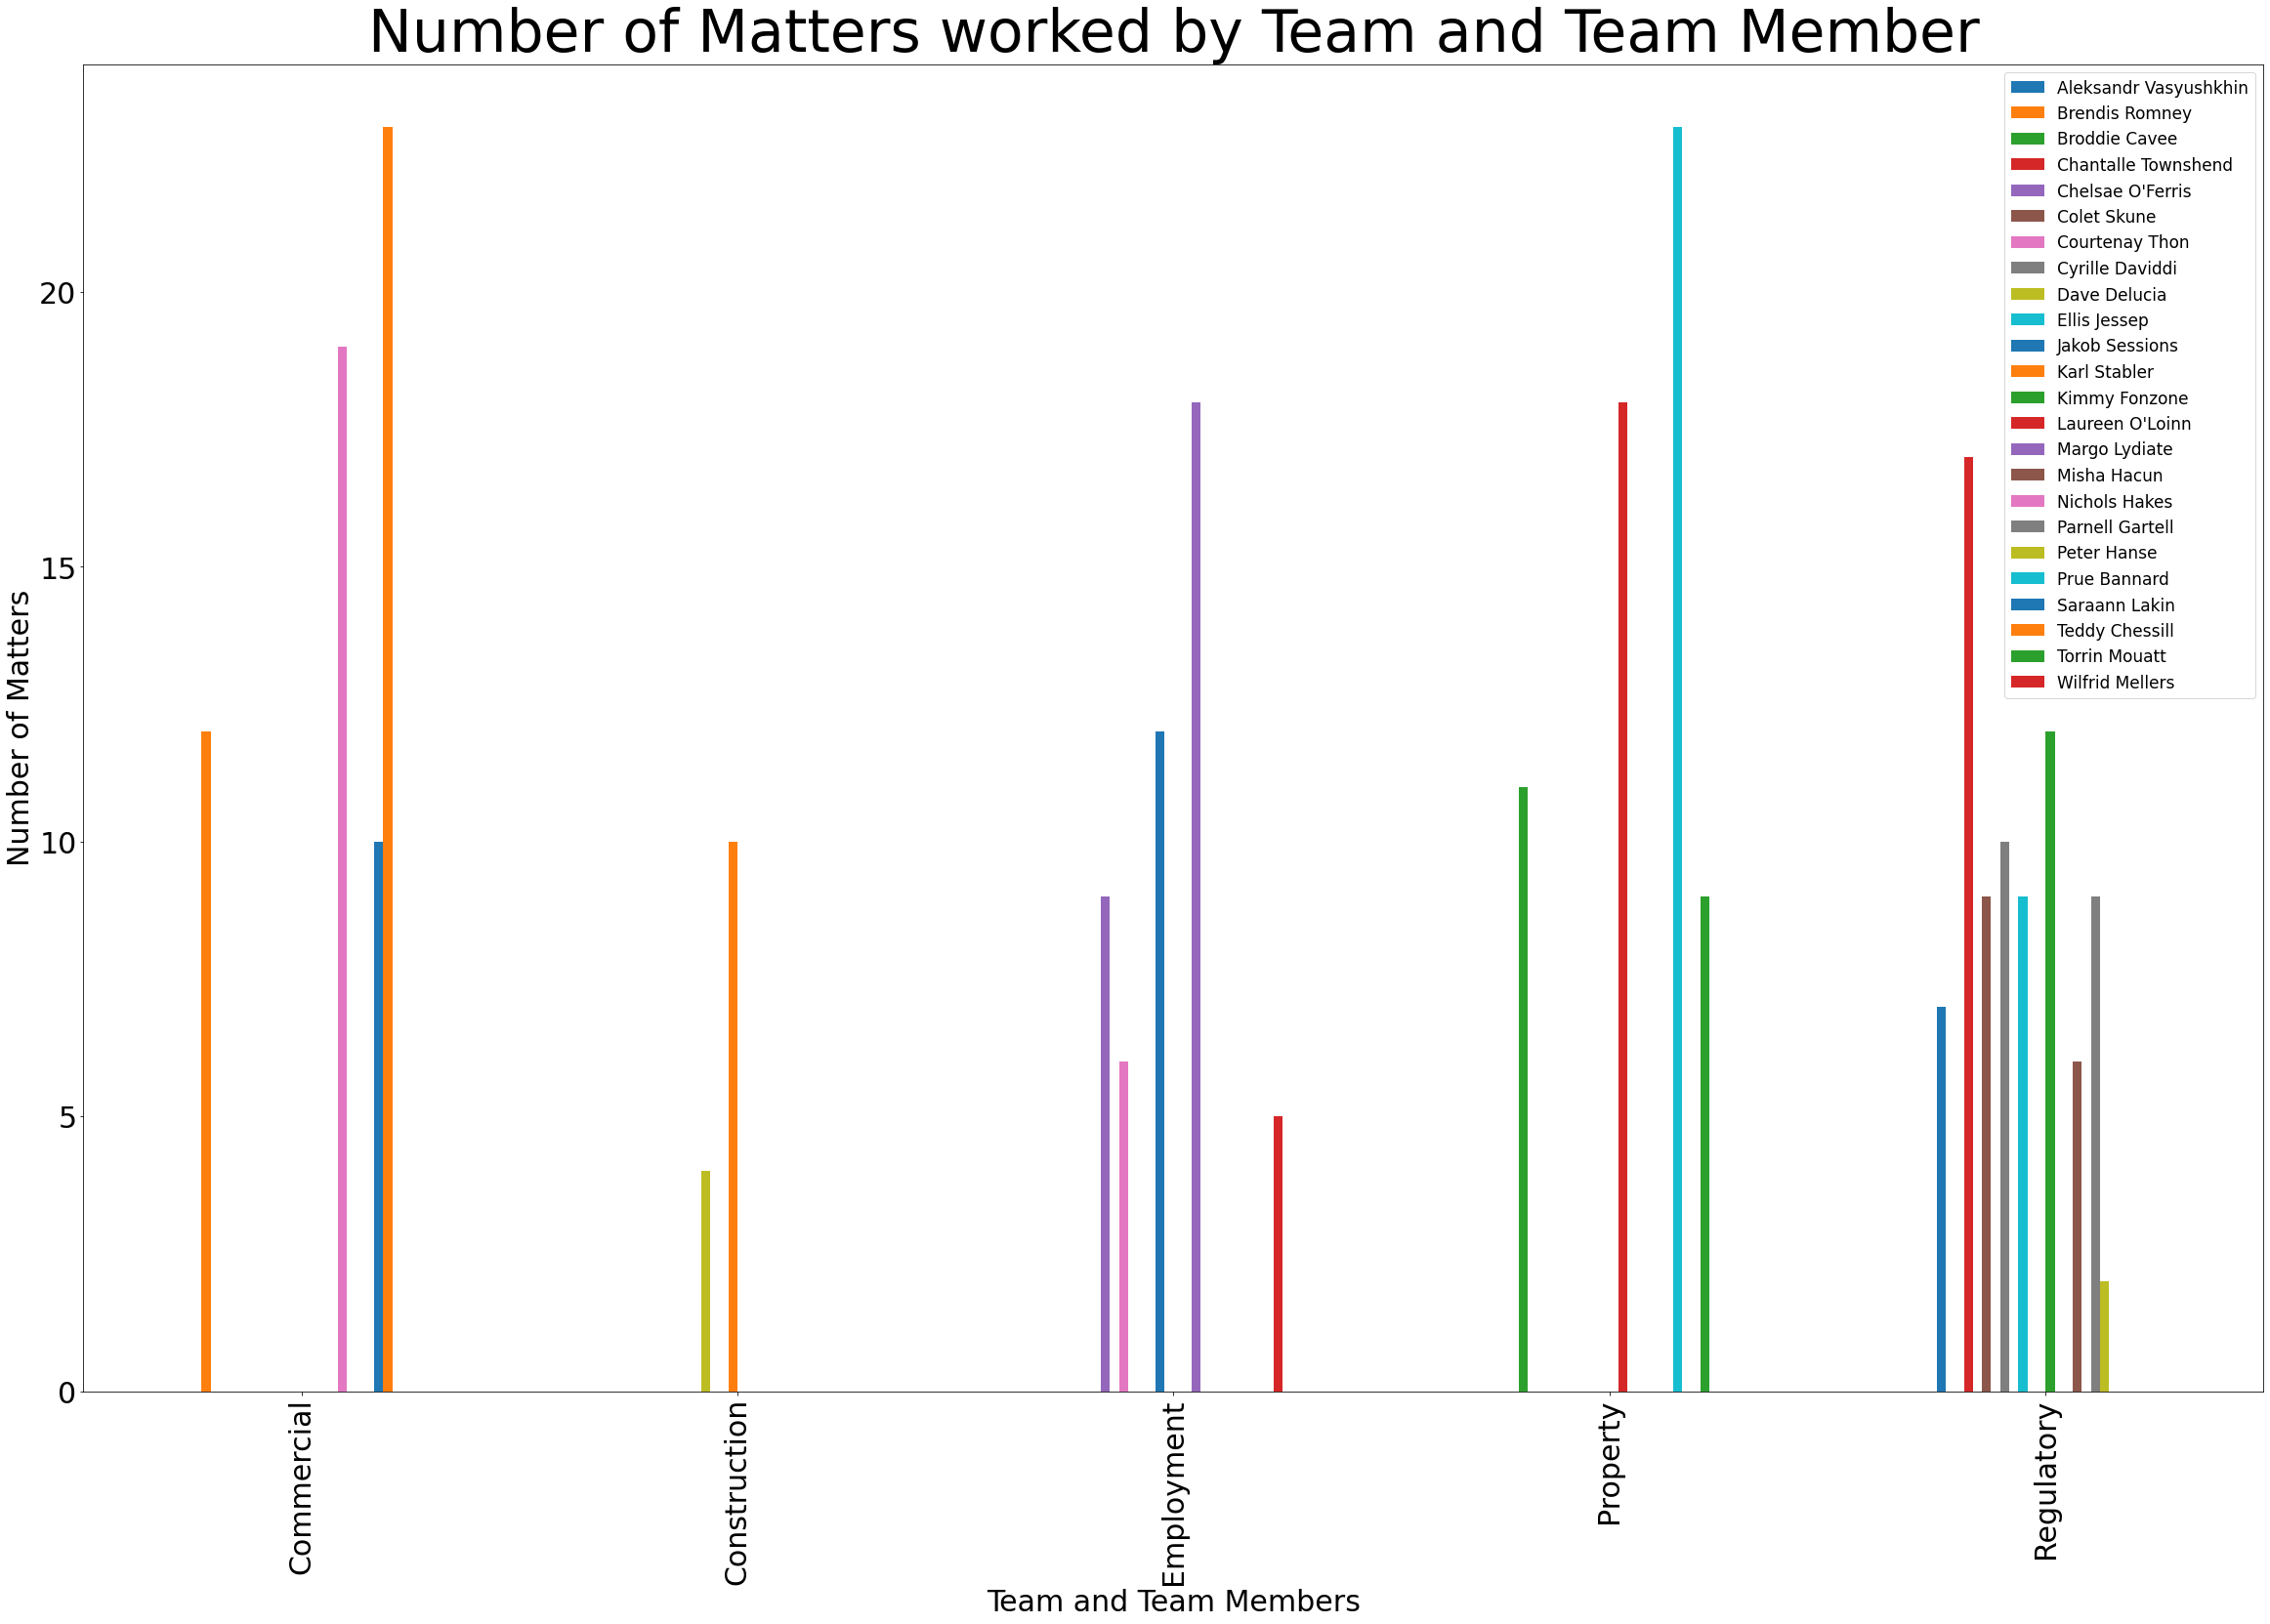

In [30]:
team_and_members.unstack(1).plot(kind = 'bar', figsize = (40,25))
plt.xlabel('Team and Team Members', fontsize = 30)
plt.xticks(fontsize = 30)
plt.ylabel('Number of Matters', fontsize = 30)
plt.yticks(fontsize = 30)
plt.title('Number of Matters worked by Team and Team Member', fontsize = 60)
plt.legend(loc = 'upper right', fontsize = 17)
plt.show()

# Insights: from the insights: Regulatory team has done the biggest number of matters

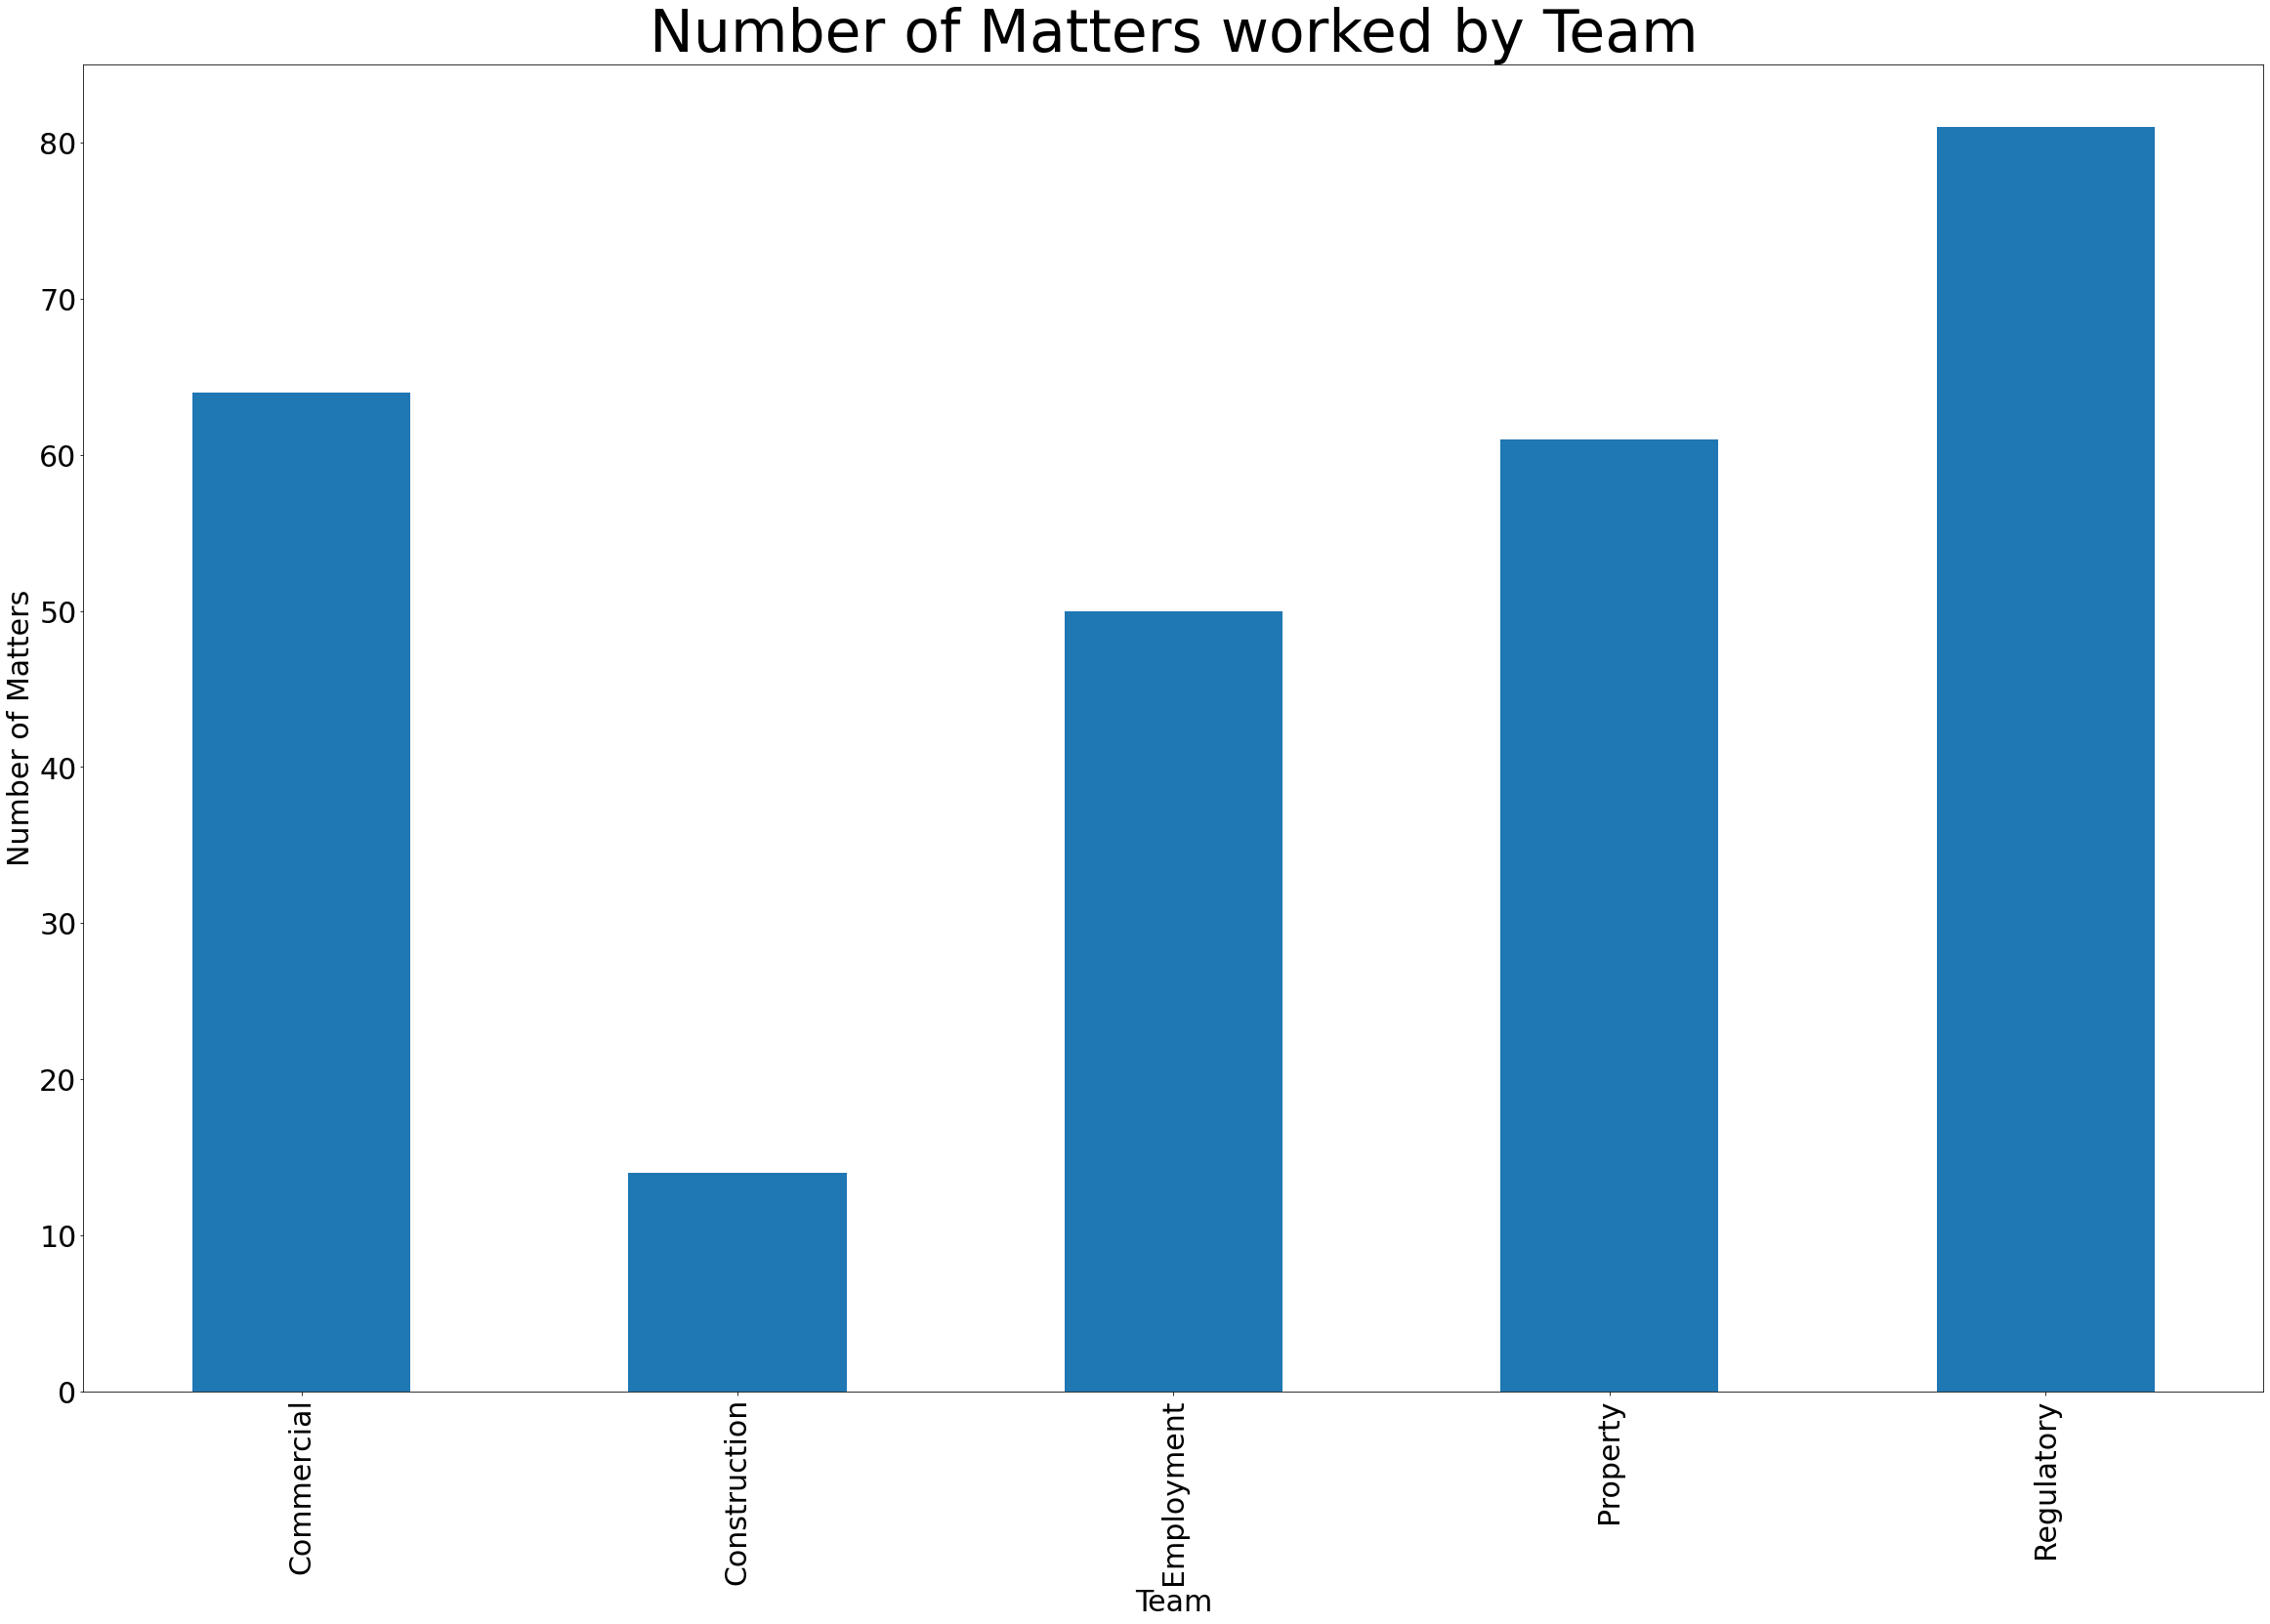

In [31]:
team_name = df.groupby('team_name')['matter_id'].count()
team_name.plot(kind = 'bar', figsize = (40,25))
plt.xlabel('Team', fontsize = 30)
plt.xticks(fontsize = 30)
plt.ylabel('Number of Matters', fontsize = 30)
plt.yticks(fontsize = 30)
plt.title('Number of Matters worked by Team', fontsize = 60)
plt.show()

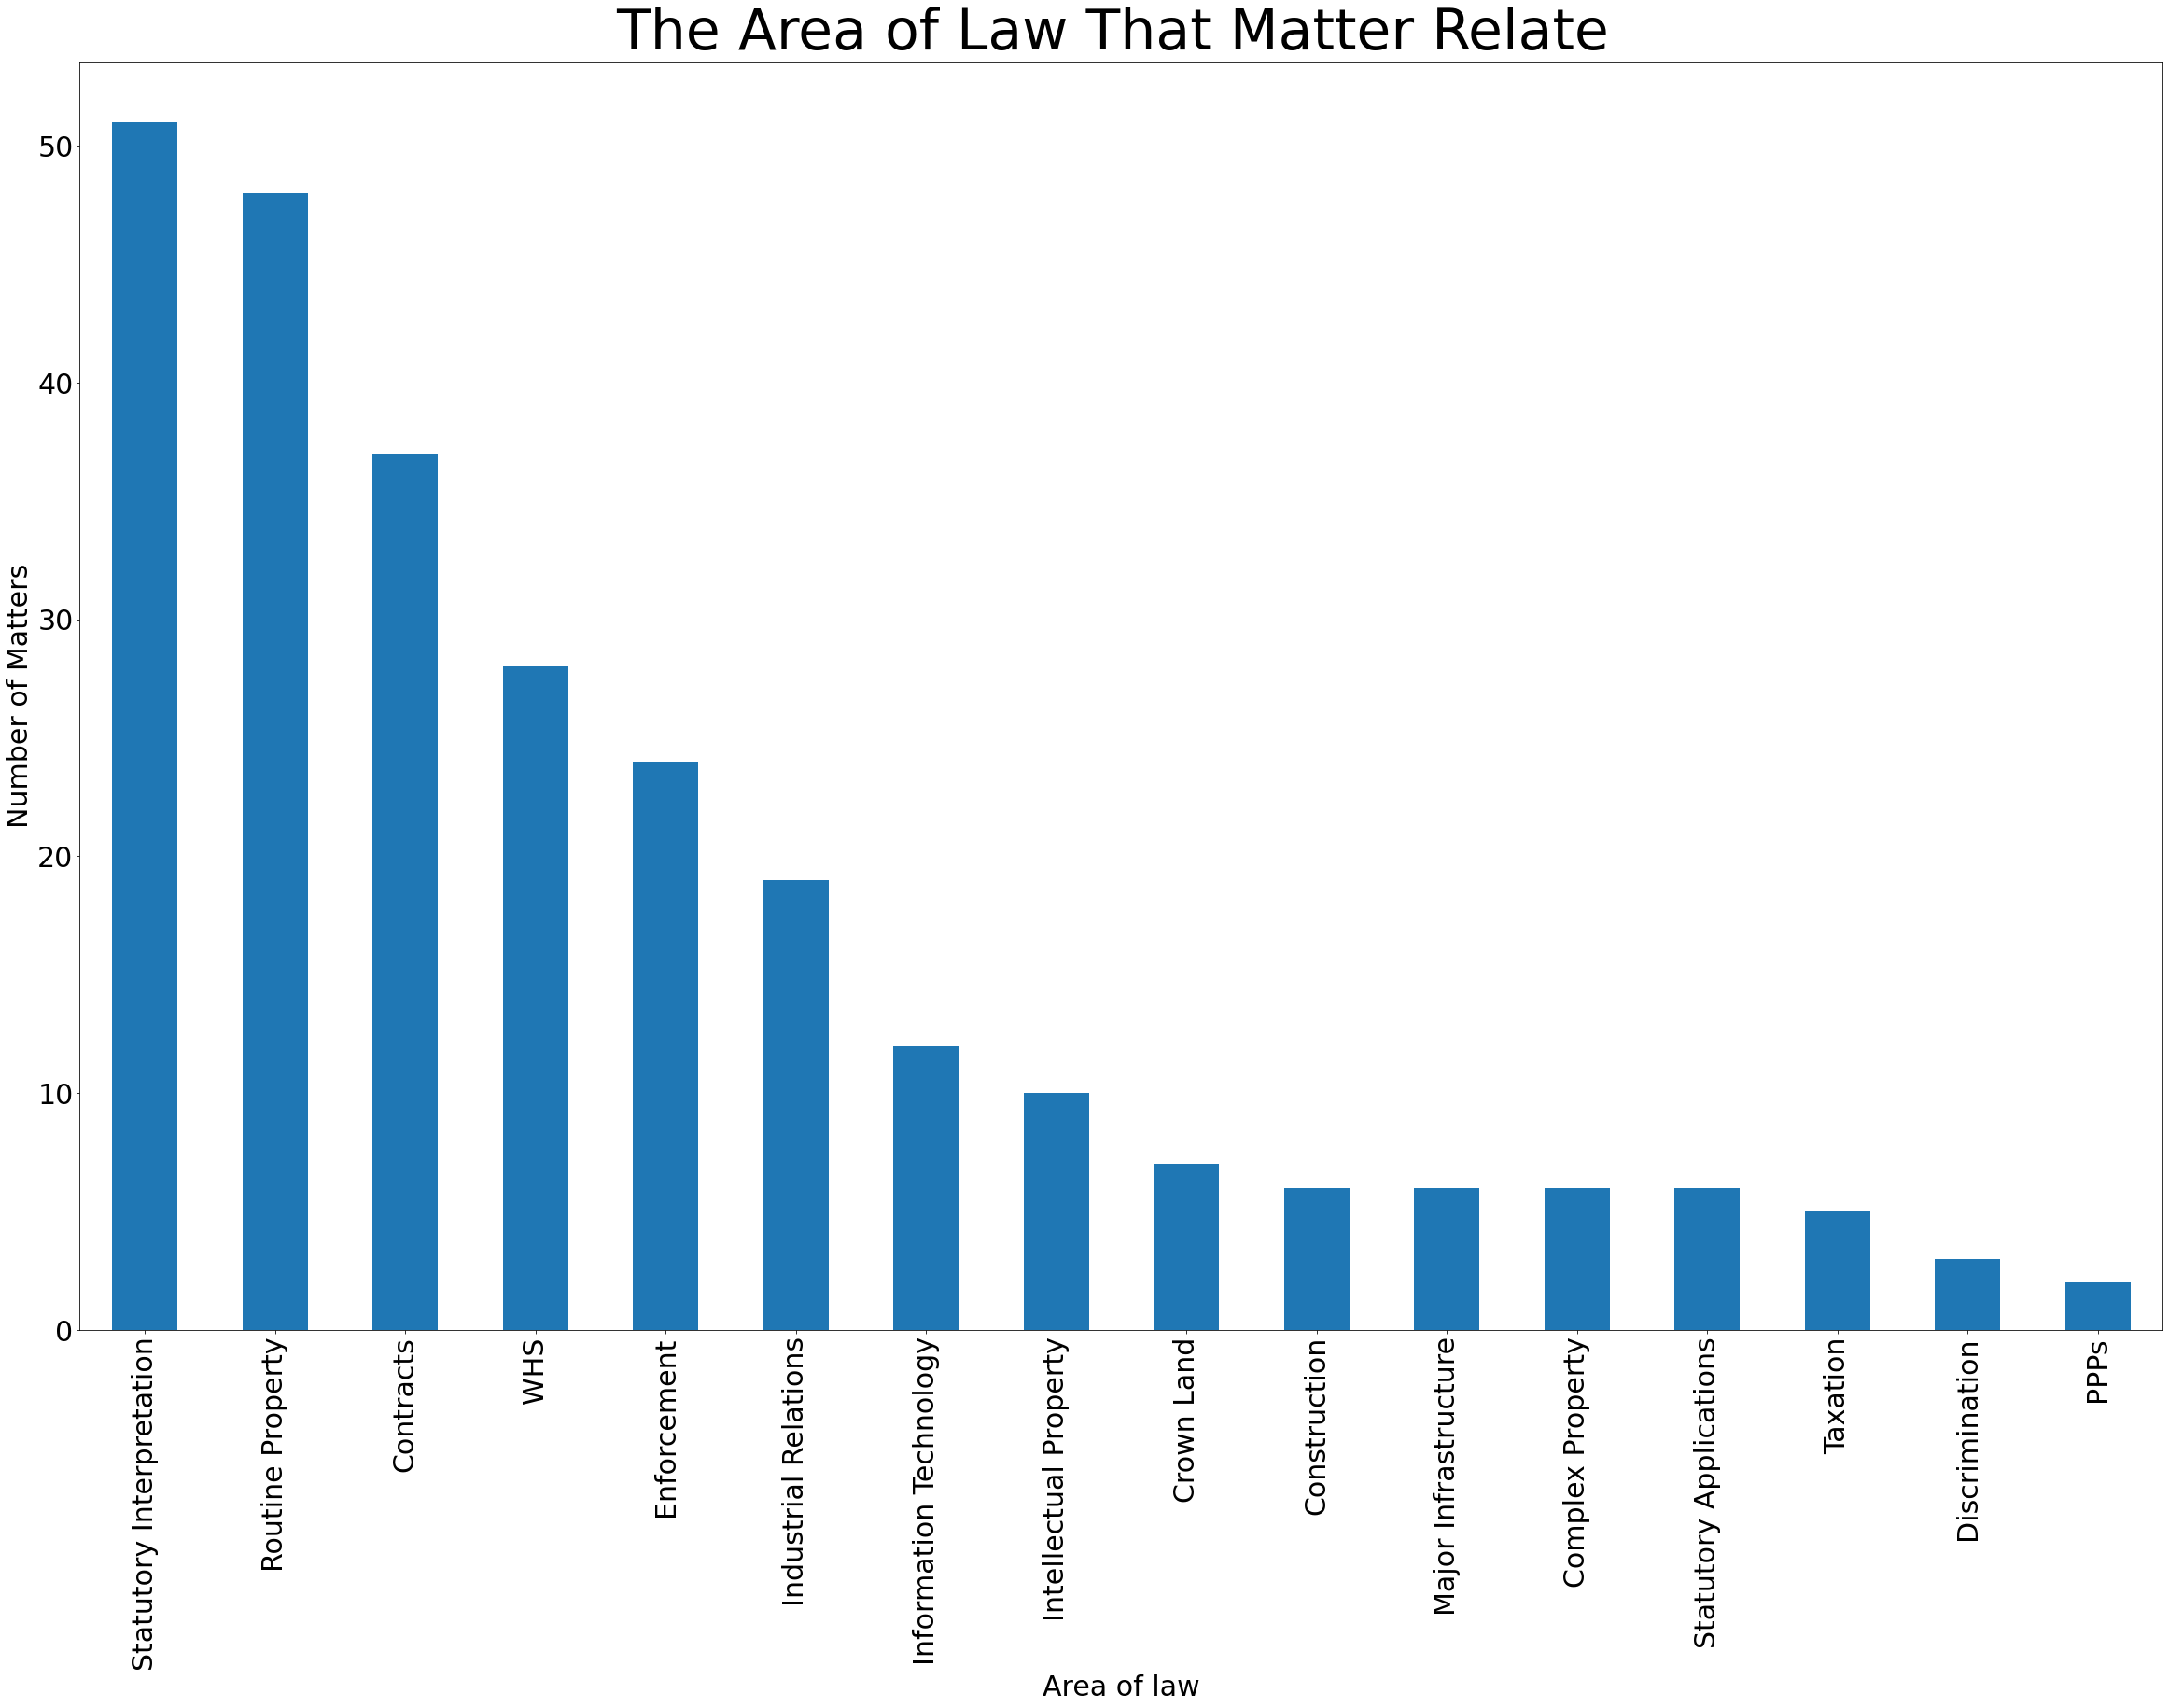

There are 16 types area of law


In [32]:
area_of_law = df['area_of_law'].value_counts()
area_of_law.plot(kind = 'bar', figsize = (40,25))
plt.xlabel('Area of law', fontsize = 30)
plt.xticks(fontsize = 30)
plt.ylabel('Number of Matters', fontsize = 30)
plt.yticks(fontsize = 30)
legend = 'There are ' + str(len(df['area_of_law'].unique())) +' types area of law'
plt.title('The Area of Law That Matter Relate ', fontsize = 60)
plt.show()
print(legend)

In [17]:
df['area_of_law'].value_counts()

Statutory Interpretation    51
Routine Property            48
Contracts                   37
WHS                         28
Enforcement                 24
Industrial Relations        19
Information Technology      12
Intellectual Property       10
Crown Land                   7
Construction                 6
Major Infrastructure         6
Complex Property             6
Statutory Applications       6
Taxation                     5
Discrimination               3
PPPs                         2
Name: area_of_law, dtype: int64

In [18]:
df['client'].value_counts()

Training                    27
Compliance                  26
Engineering                 25
Support                     25
Human Resources             25
Safety                      24
Regional                    24
Operations                  21
Research and Development    21
Business Development        19
Accounting                  19
Services                    14
Name: client, dtype: int64

In [19]:
internal_df = df[df['external_law_firm'] == 'No Firm - Internal Only']
internal_df

,matter_id,team_name,area_of_law,lawyer_name,external_law_firm,client,start_date,end_date
2,17451,Commercial,Contracts,Nichols Hakes,No Firm - Internal Only,Research and Development,2021-03-17,2021-06-23
6,41684,Commercial,Intellectual Property,Teddy Chessill,No Firm - Internal Only,Accounting,2020-08-22,2021-06-27
8,53112,Commercial,Contracts,Nichols Hakes,No Firm - Internal Only,Training,2020-10-27,2021-04-22
10,67790,Commercial,Contracts,Nichols Hakes,No Firm - Internal Only,Business Development,2021-05-02,2021-10-05
13,79854,Commercial,Contracts,Nichols Hakes,No Firm - Internal Only,Safety,2020-07-29,2020-11-24
...,...,...,...,...,...,...,...,...
313,3159326,Commercial,Contracts,Brendis Romney,No Firm - Internal Only,Services,2020-09-04,2021-04-10
314,3169389,Commercial,Contracts,Brendis Romney,No Firm - Internal Only,Support,2021-05-21,2021-12-02
320,3222554,Commercial,Contracts,Saraann Lakin,No Firm - Internal Only,Support,2021-06-16,2021-07-25
321,3238768,Regulatory,Statutory Interpretation,Kimmy Fonzone,No Firm - Internal Only,Regional,2021-01-27,2021-02-17


There are  12  supported internal business clients


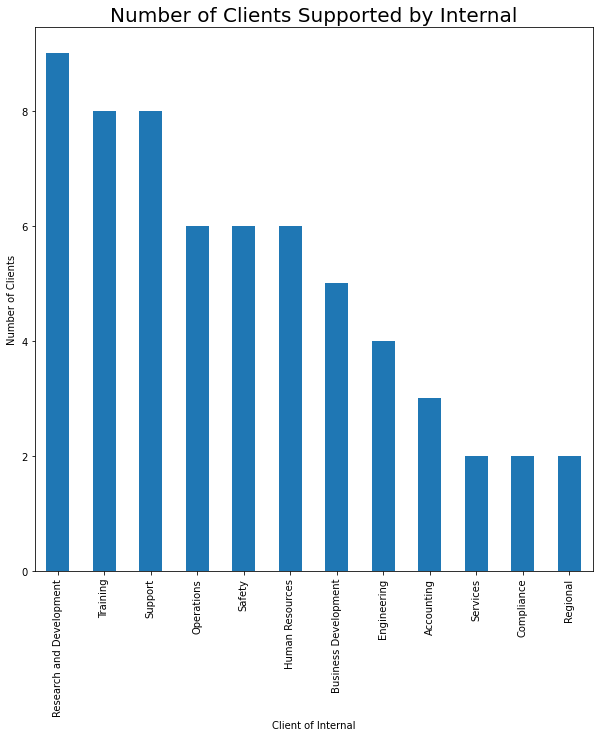

In [34]:
internal_clients = internal_df['client'].value_counts()
internal_clients.plot(kind = 'bar', figsize = (10,10))
plt.xlabel('Client of Internal')
plt.xticks(fontsize = 10)
plt.ylabel('Number of Clients')
plt.yticks(fontsize = 10)
plt.title('Number of Clients Supported by Internal', fontsize = 20)

print('There are ', str(len(internal_df['client'].unique())), ' supported internal business clients')

In [21]:
# Supported internal business clients
print('Number of supported internal business clients ',len(internal_df['client'].unique()))

# Insights: There are 12 supported internal clients

Number of supported internal business clients  12


Text(0.5, 1.0, 'Proportion of Internal Matters vs External Matters')

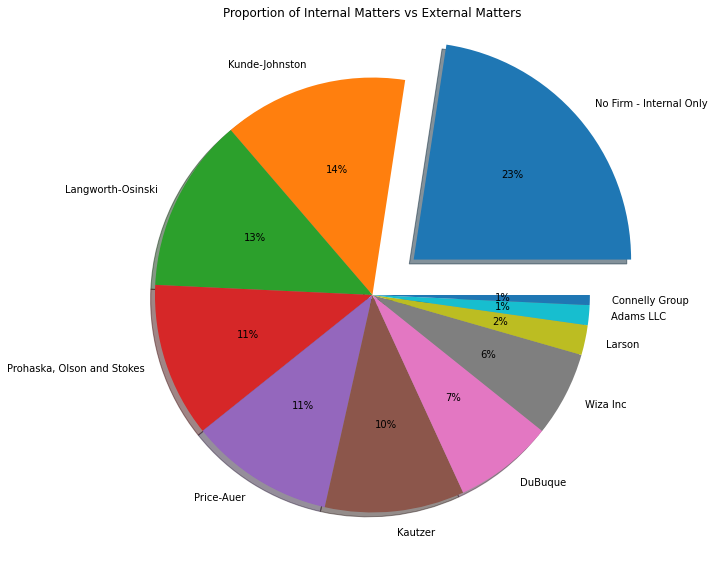

In [22]:
external_law_firm_prop = df['external_law_firm'].value_counts(normalize = True)
labels = ['No Firm - Internal Only', 
          'Kunde-Johnston', 
          'Langworth-Osinski', 
          'Prohaska, Olson and Stokes', 
          'Price-Auer',
          'Kautzer',
          'DuBuque',
          'Wiza Inc',
          'Larson',
          'Adams LLC',
          'Connelly Group'
         ]
explode = explode = (0.25, 0, 0, 0, 0, 0, 0, 0, 0 , 0 , 0)
plt.figure(figsize = (10,10))
plt.pie(external_law_firm_prop, labels = labels, explode = explode, autopct = '%1.0f%%', shadow = True)
plt.title('Proportion of Internal Matters vs External Matters')

# Insights: Internal matters cover 23% of the whole proportion where the external matter covers 77%

In [23]:
from datetime import datetime as dt
df['duration'] = (df['end_date'] - df['start_date']).dt.days

In [24]:
df.head()

,matter_id,team_name,area_of_law,lawyer_name,external_law_firm,client,start_date,end_date,duration
0,1931,Commercial,Information Technology,Brendis Romney,DuBuque,Safety,2021-03-12,2021-05-22,71
1,4511,Commercial,Intellectual Property,Teddy Chessill,Langworth-Osinski,Regional,2020-10-15,2020-10-18,3
2,17451,Commercial,Contracts,Nichols Hakes,No Firm - Internal Only,Research and Development,2021-03-17,2021-06-23,98
3,22426,Commercial,Contracts,Nichols Hakes,"Prohaska, Olson and Stokes",Operations,2020-11-13,2021-01-02,50
5,37608,Commercial,Contracts,Nichols Hakes,"Prohaska, Olson and Stokes",Safety,2021-05-17,2021-07-24,68


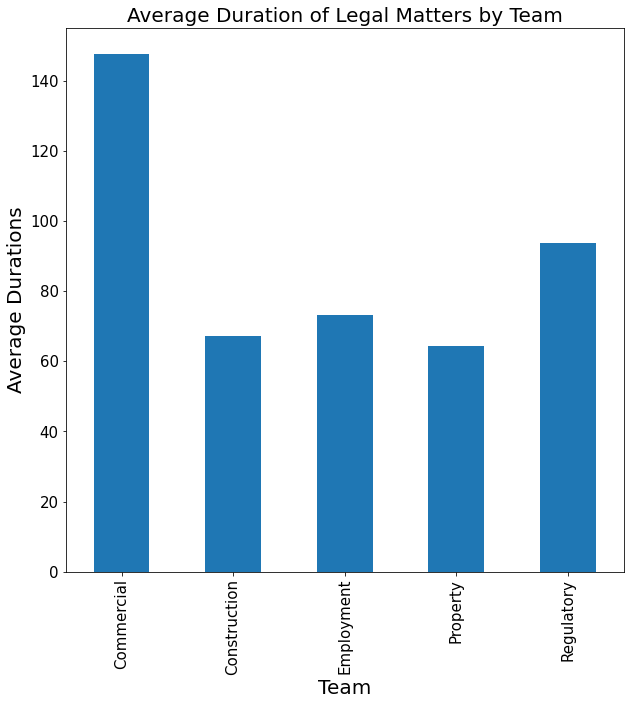

team_name
Commercial      147.687500
Construction     67.285714
Employment       73.260000
Property         64.377049
Regulatory       93.654321
Name: duration, dtype: float64

In [27]:
team_name = df.groupby('team_name')['duration'].mean()
team_name.plot(kind = 'bar', figsize = (10,10))
plt.xlabel('Team', fontsize = 20)
plt.xticks(fontsize = 15)
plt.ylabel('Average Durations', fontsize = 20)
plt.yticks(fontsize = 15)
plt.title('Average Duration of Legal Matters by Team', fontsize = 20)
plt.show()

team_name

# Insights: Commercial takes the longest duration to complete the matters 

In [29]:
print('Average duration of legal matters ', str(df['duration'].mean()), ' days')

Average duration of legal matters  94.70370370370371  days
